# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

#Add this to catch HTTPError
from urllib.error import HTTPError
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
output_data_file2 = "citiesWithInfo.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Generate Cities List

In [11]:
#Create a dataFrame for cities generated by Citipy
cities_df =  pd.DataFrame(cities, columns = ["City"])

#Saving original list of cities generated by Citipy to a csv file
export_csv = cities_df.to_csv(output_data_file)

#Display first 5 rows
cities_df.head()

,City
0,longlac
1,bahia de caraquez
2,lhokseumawe
3,kiunga
4,prainha


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Create a settings dictionary with your API key and preferred units
settings = {"units": "metric", "appid": api_key}

#Define time in generating data
time_gen = time.strftime('%d-%m-%Y', time.localtime())

# Get data for each city in the cities_df
weather_data = []

# Starting generating process
print("Beginning Data Retrieval")     
print(f"Data Generated on: {time_gen}")
print("-----------------------------")

# Loop through the list of cities and perform a weather check for each city
# When data is not found, catch HTTPError and skip to next city
for index, row in cities_df.iterrows():
    print(f"Processing Record {index} | {row[0]}")
    try:
        weather_data.append(ow.get_current(row[0], **settings))
    except HTTPError:
        print("City not found. Skipping...")
          
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
Data Generated on: 06-11-2019
-----------------------------
Processing Record 0 | longlac
City not found. Skipping...
Processing Record 1 | bahia de caraquez
Processing Record 2 | lhokseumawe
Processing Record 3 | kiunga
Processing Record 4 | prainha
Processing Record 5 | kokkola
Processing Record 6 | belushya guba
City not found. Skipping...
Processing Record 7 | yellowknife
Processing Record 8 | khatanga
Processing Record 9 | haines junction
Processing Record 10 | taolanaro
City not found. Skipping...
Processing Record 11 | rikitea
Processing Record 12 | sola
Processing Record 13 | irkutsk
Processing Record 14 | la ronge
Processing Record 15 | mataura
Processing Record 16 | carnarvon
Processing Record 17 | mishelevka
Processing Record 18 | mackay
Processing Record 19 | ugoofaaru
Processing Record 20 | hobart
Processing Record 21 | luanda
Processing Record 22 | kapaa
Processing Record 23 | beoumi
Processing Record 24 | mar del plata
Processing Record 25 | cape

Processing Record 230 | esterhazy
Processing Record 231 | saint anthony
Processing Record 232 | yar-sale
Processing Record 233 | cabra
Processing Record 234 | temple
Processing Record 235 | saint george
Processing Record 236 | naryan-mar
Processing Record 237 | lolua
City not found. Skipping...
Processing Record 238 | tiksi
Processing Record 239 | nakambala
Processing Record 240 | tuatapere
Processing Record 241 | doctor pedro p. pena
City not found. Skipping...
Processing Record 242 | berlevag
Processing Record 243 | harper
Processing Record 244 | fort nelson
Processing Record 245 | avarua
Processing Record 246 | cabo san lucas
Processing Record 247 | brookhaven
Processing Record 248 | sira
Processing Record 249 | kerki
City not found. Skipping...
Processing Record 250 | qaqortoq
Processing Record 251 | buraydah
Processing Record 252 | bontang
Processing Record 253 | colares
Processing Record 254 | acara
City not found. Skipping...
Processing Record 255 | mogwase
Processing Record 256

Processing Record 460 | la ciotat
Processing Record 461 | urumqi
City not found. Skipping...
Processing Record 462 | muros
Processing Record 463 | nome
Processing Record 464 | baragua
Processing Record 465 | lavumisa
Processing Record 466 | puerto baquerizo moreno
Processing Record 467 | lavrentiya
Processing Record 468 | biak
Processing Record 469 | akdepe
Processing Record 470 | kokopo
Processing Record 471 | jumla
Processing Record 472 | port blair
Processing Record 473 | moussoro
Processing Record 474 | jalu
Processing Record 475 | guangyuan
Processing Record 476 | chernyshevskiy
Processing Record 477 | touros
Processing Record 478 | bonavista
Processing Record 479 | alugan
Processing Record 480 | samarai
Processing Record 481 | gijon
Processing Record 482 | beeville
Processing Record 483 | pacific grove
Processing Record 484 | aparan
Processing Record 485 | brae
Processing Record 486 | edson
Processing Record 487 | ayagoz
Processing Record 488 | grand baie
Processing Record 489 | 

In [13]:
#Saving The API Results for future reference
#The weather API responded with: 
#{'coord': {'lon': -0.13, 'lat': 51.51}, 
#'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}, 
#			{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 
#'base': 'stations', 
#'main': {'temp': 277.48, 'pressure': 1026, 'humidity': 86, 'temp_min': 277.15, 'temp_max': 278.15}, 'visibility': 5000, 
#'wind': {'speed': 2.1, 'deg': 360}, 
#'clouds': {'all': 90}, 
#'dt': 1519240800, 
#'sys': {'type': 1, 'id': 5093, 'message': 0.0062, 'country': 'GB', 'sunrise': 1519196463, 'sunset': 1519234070}, 
#'id': 2643743, 
#'name': 'London', 
#'cod': 200}

#Count how many data generated, to make sure we have enough data sample for plot
len(weather_data)

573

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create an "extracts" object to get data needed in each city
summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City",'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat','Lng', 'Max Temp', 'Wind Speed']
weather_data_df = pd.DataFrame(data, columns=column_names)

# Save city and other information data to a csv file
export_csv = weather_data_df.to_csv(output_data_file2)

weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bahia de Caraquez,40,EC,1573094918,78,-0.60,-80.42,23.00,5.10
1,Lhokseumawe,80,ID,1573094918,74,5.18,97.15,27.04,1.55
2,Kiunga,82,PG,1573094918,58,-6.12,141.30,31.40,0.98
3,Prainha,60,BR,1573094918,62,-1.80,-53.48,27.63,1.57
4,Kokkola,100,FI,1573094918,84,63.84,23.13,2.78,1.50


In [16]:
#Again Checking number of data
weather_data_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
# Saving Plot settings into a function
def set_scatter_properties(xtitle,ytitle,xlabel,ylabel):
    plt.title(f"{xtitle} vs. {ytitle} on " + time_gen)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)

#### Latitude vs. Temperature Plot

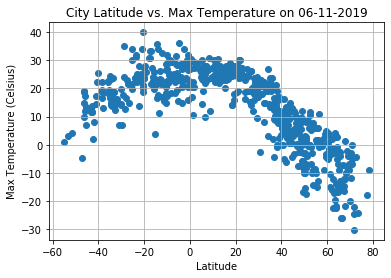

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
set_scatter_properties("City Latitude","Max Temperature","Latitude","Max Temperature (Celsius)")

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

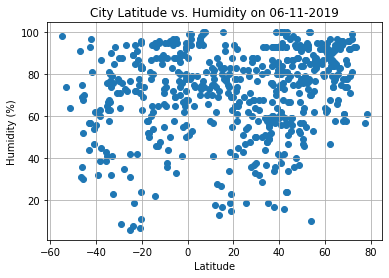

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df['Humidity'], marker="o")

# Incorporate the other graph properties
set_scatter_properties("City Latitude","Humidity","Latitude","Humidity (%)")

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

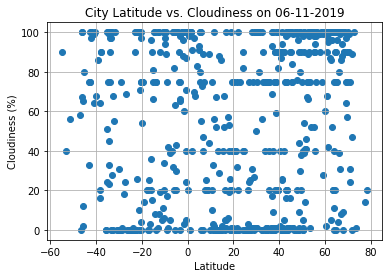

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
set_scatter_properties("City Latitude","Cloudiness","Latitude","Cloudiness (%)")

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

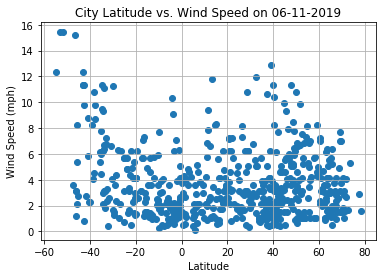

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
set_scatter_properties("City Latitude","Wind Speed","Latitude","Wind Speed (mph)")

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

# Conclusions

We can conclude based on weather related data generated using OpenWeather API, as follows: 

1 Cities with Maximum Temperature are located near latitude 0, which is near Equator line, which are tropical countries

2 Cloudiness seems to be well spread for November 6, 2019

3 Only a few cities have windspeed more than 10 mph, as most of the cities fall below 6 mph

4 Humidity of most cities observed seem to be in range 60-100%